In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
help(np.linalg.eigh)

Help on function eigh in module numpy.linalg.linalg:

eigh(a, UPLO='L')
    Return the eigenvalues and eigenvectors of a Hermitian or symmetric matrix.
    
    Returns two objects, a 1-D array containing the eigenvalues of `a`, and
    a 2-D square array or matrix (depending on the input type) of the
    corresponding eigenvectors (in columns).
    
    Parameters
    ----------
    a : (..., M, M) array
        Hermitian/Symmetric matrices whose eigenvalues and
        eigenvectors are to be computed.
    UPLO : {'L', 'U'}, optional
        Specifies whether the calculation is done with the lower triangular
        part of `a` ('L', default) or the upper triangular part ('U').
        Irrespective of this value only the real parts of the diagonal will
        be considered in the computation to preserve the notion of a Hermitian
        matrix. It therefore follows that the imaginary part of the diagonal
        will always be treated as zero.
    
    Returns
    -------
    w : (..

In [15]:
def generateData(N,d,μ,Σ):
    A = np.linalg.cholesky(Σ)
    X = A.dot(np.random.randn(N,d).T).T + μ
    return X

In [16]:
X = generateData(1000, 2, np.array([3,5]), np.array([12,3,3,1]).reshape(2,2))

In [17]:
X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

In [18]:
S = np.cov(X_std.T)
print(S)

[[ 1.001001    0.87749574]
 [ 0.87749574  1.001001  ]]


In [19]:
Λ,V = np.linalg.eigh(S)
print('Λ: ',Λ,'\n\nV: ',V)

Λ:  [ 0.12350526  1.87849674] 

V:  [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [20]:
Y = X_std.dot(V)
Y /= np.sqrt(Λ)
print(Y)

[[-0.62529784 -0.53538923]
 [-1.08913493 -0.92511829]
 [ 0.45300598 -0.43886391]
 ..., 
 [-0.40533238  0.26076144]
 [ 0.02360292  0.55005087]
 [-0.83626864  0.30001853]]


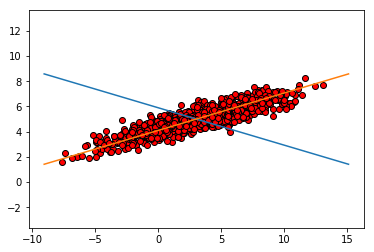

In [21]:
plt.plot(X[:,0],X[:,1], 'ko', markerfacecolor='r')
plt.axis('equal')
plt.plot(np.array([-5 * V[0,0] , 5 * V[0,0]]) * np.std(X,axis=0)[0] + np.mean(X,axis=0)[0], np.array([-5 * V[1,0] , 5 * V[1,0]]) * np.std(X,axis=0)[1] + np.mean(X,axis=0)[1]) 
plt.plot(np.array([-5 * V[0,1] , 5 * V[0,1]]) * np.std(X,axis=0)[0] + np.mean(X,axis=0)[0], np.array([-5 * V[1,1] , 5 * V[1,1]]) * np.std(X,axis=0)[1] + np.mean(X,axis=0)[1]) 

plt.show()

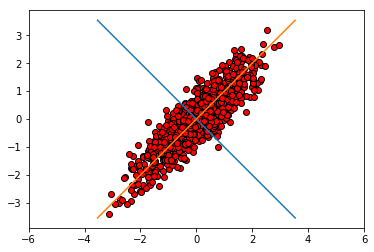

In [22]:
plt.plot(X_std[:,0],X_std[:,1], 'ko', markerfacecolor='r')
plt.plot([-5 * V[0,0] , 5 * V[0,0]], [-5 * V[1,0] , 5 * V[1,0]]) 
plt.axis('equal')
plt.plot([-5 * V[0,1],5 * V[0,1]], [-5 * V[1,1],5 * V[1,1]])
plt.show()

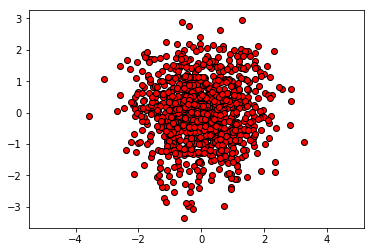

In [23]:
plt.plot(Y[:,0],Y[:,1], 'ko', markerfacecolor='r')
plt.axis('equal')
plt.show()

In [24]:
def computeStats(X):
    print('Mean: ', np.mean(X,axis=0))
    print('Variance: ', np.std(X,axis=0)**2)
    print('Covariance:\n', np.cov(X.T))
    print('Corrcoef:\n', np.corrcoef(X.T),'\n')

In [25]:
print('Original data stats:')
computeStats(X)
print('Stadarized data stats:')
computeStats(X_std)
print('Data after PCA stats:')
computeStats(Y)

Original data stats:
Mean:  [ 3.03809408  4.99515043]
Variance:  [ 11.67344711   1.02860431]
Covariance:
 [[ 11.68513224   3.04066621]
 [  3.04066621   1.02963394]]
Corrcoef:
 [[ 1.          0.87661825]
 [ 0.87661825  1.        ]] 

Stadarized data stats:
Mean:  [ -2.48689958e-17   8.98836561e-16]
Variance:  [ 1.  1.]
Covariance:
 [[ 1.001001    0.87749574]
 [ 0.87749574  1.001001  ]]
Corrcoef:
 [[ 1.          0.87661825]
 [ 0.87661825  1.        ]] 

Data after PCA stats:
Mean:  [  1.86584082e-15   4.54913884e-16]
Variance:  [ 0.999  0.999]
Covariance:
 [[ 1.  0.]
 [ 0.  1.]]
Corrcoef:
 [[ 1.  0.]
 [ 0.  1.]] 



In [26]:
def generateMixtureData(N,d,k,μ,Σ):
    A = np.linalg.cholesky(Σ)
    dist = np.random.randint(0,3,N)
    X = A.dot(np.random.randn(N,d).T).T + μ[dist,:]
    return X

In [27]:
X = generateMixtureData(1000,2,3,np.array([-21,-2,3,5,27,12]).reshape(3,2), np.array([12,3,3,1]).reshape(2,2))

In [28]:
X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

In [29]:
S = np.cov(X_std.T)
print(S)

[[ 1.001001    0.99703893]
 [ 0.99703893  1.001001  ]]


In [30]:
Λ,V = np.linalg.eigh(S)
print('Λ: ',Λ,'\n\nV: ',V)

Λ:  [ 0.00396207  1.99803993] 

V:  [[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


In [31]:
Y = X_std.dot(V)
Y /= np.sqrt(Λ)
print(Y)

[[ 0.47705443  1.05603142]
 [-0.48022987 -1.42679856]
 [-0.79914672  1.26351803]
 ..., 
 [ 1.89999846  1.57487532]
 [ 0.85877002 -1.20110502]
 [-1.57475165  1.43900268]]


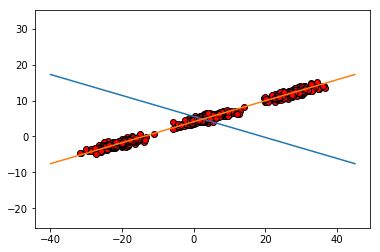

In [32]:
plt.plot(X[:,0],X[:,1], 'ko', markerfacecolor='r')
plt.plot(np.array([-3 * V[0,0] , 3 * V[0,0]]) * np.std(X,axis=0)[0] + np.mean(X,axis=0)[0], np.array([-3 * V[1,0] , 3 * V[1,0]]) * np.std(X,axis=0)[1] + np.mean(X,axis=0)[1]) 
plt.plot(np.array([-3 * V[0,1] , 3 * V[0,1]]) * np.std(X,axis=0)[0] + np.mean(X,axis=0)[0], np.array([-3 * V[1,1] , 3 * V[1,1]]) * np.std(X,axis=0)[1] + np.mean(X,axis=0)[1]) 
plt.axis('equal')
plt.show()

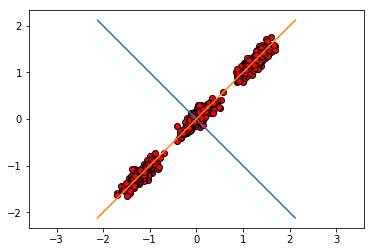

In [33]:
plt.plot(X_std[:,0],X_std[:,1], 'ko', markerfacecolor='r')
plt.plot([-3 * V[0,0] , 3 * V[0,0]], [-3 * V[1,0] , 3 * V[1,0]]) 
plt.axis('equal')
plt.plot([-3 * V[0,1],3 * V[0,1]], [-3 * V[1,1],3 * V[1,1]])
plt.show()

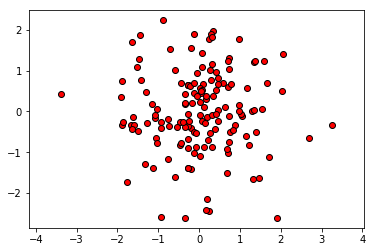

In [55]:
plt.plot(Y[:,0],Y[:,1], 'ko', markerfacecolor='r')
plt.axis('equal')
plt.show()

In [35]:
print('Original data stats:')
computeStats(X)
print('Stadarized data stats:')
computeStats(X_std)
print('Data after PCA stats:')
computeStats(Y)

Original data stats:
Mean:  [ 2.51072417  4.85097844]
Variance:  [ 400.45153849   34.36050758]
Covariance:
 [[ 400.85239088  116.95448564]
 [ 116.95448564   34.39490248]]
Corrcoef:
 [[ 1.          0.99604189]
 [ 0.99604189  1.        ]] 

Stadarized data stats:
Mean:  [  1.24567023e-16  -1.36113343e-16]
Variance:  [ 1.  1.]
Covariance:
 [[ 1.001001    0.99703893]
 [ 0.99703893  1.001001  ]]
Corrcoef:
 [[ 1.          0.99604189]
 [ 0.99604189  1.        ]] 

Data after PCA stats:
Mean:  [  2.69162470e-15  -2.06501483e-17]
Variance:  [ 0.999  0.999]
Covariance:
 [[  1.00000000e+00   2.36491952e-16]
 [  2.36491952e-16   1.00000000e+00]]
Corrcoef:
 [[  1.00000000e+00   2.36491952e-16]
 [  2.36491952e-16   1.00000000e+00]] 



In [36]:
import sklearn.datasets

In [37]:
iris_data = sklearn.datasets.load_iris()

In [38]:
X = iris_data.data
X.shape

(150, 4)

In [39]:
X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

In [40]:
S = np.cov(X_std.T)
print(S)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [41]:
Λ,V = np.linalg.eigh(S)
print('Λ: ',Λ,'\n\nV: ',V)

Λ:  [ 0.02074601  0.14834223  0.92740362  2.93035378] 

V:  [[ 0.26199559  0.72101681  0.37231836 -0.52237162]
 [-0.12413481 -0.24203288  0.92555649  0.26335492]
 [-0.80115427 -0.14089226  0.02109478 -0.58125401]
 [ 0.52354627 -0.6338014   0.06541577 -0.56561105]]


In [42]:
Y = X_std.dot(V)
Y /= np.sqrt(Λ)

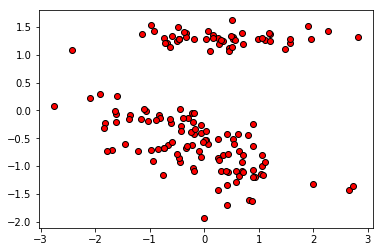

In [43]:
plt.plot(Y[:,2],Y[:,3], 'ko', markerfacecolor='r')
plt.show()

In [44]:
Z_std = np.sqrt(Λ[2]) * Y[:,2,np.newaxis] * V[np.newaxis,:,2] + np.sqrt(Λ[3]) * Y[:,3,np.newaxis] * V[np.newaxis,:,3]

In [45]:
Z = Z_std * X.std(axis=0) + X.mean(axis=0)

In [46]:
err = np.sum((Z - X)**2,axis=1)
print('Average error: ',np.sum(err)/150)

Average error:  0.142273039678


To jest błąd dla oryginalnych danych. Ale rzutowanie robiliśmy dla danych ustandaryzowanych. Zatem policzymy też błąd dla nich.

In [47]:
err_std = np.sum((Z_std - X_std)**2,axis=1)
print('Average error: ',np.sum(err_std)/150)
print('Sum of smaller eigenvalues: ', np.sum(Λ[:2]))

Average error:  0.167960985541
Sum of smaller eigenvalues:  0.169088240477


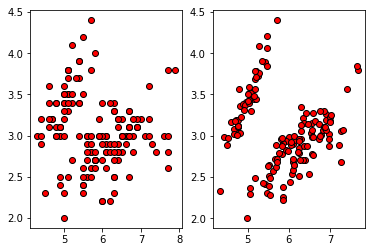

In [48]:
plt.subplot(1,2,1)
plt.plot(X[:,0],X[:,1], 'ko', markerfacecolor='r')
plt.subplot(1,2,2)
plt.plot(Z[:,0],Z[:,1], 'ko', markerfacecolor='r')
plt.show()

In [49]:
def reduceDimensionality(X, Λ, V, k):
    Y = (X * np.sqrt(Λ))[:,-k:].dot(V.T[-k:,:])
    return Y

In [50]:
w = reduceDimensionality(Y, Λ,V,2)
np.all(w == Z_std)
# w.shape

True

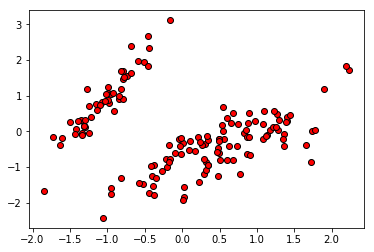

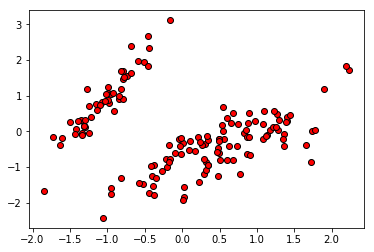

In [51]:
plt.plot(w[:,0],w[:,1], 'ko', markerfacecolor='r')
plt.show()
plt.plot(Z_std[:,0],Z_std[:,1], 'ko', markerfacecolor='r')
plt.show()